# AccelerateAI - Data Science Global Bootcamp

### Machine Learning approach - using sklearn library

In [23]:
import numpy as np 
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Importing the datasets
startup_df = pd.read_csv('50_Startups_data.csv')
startup_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,153441.51,101145.55,407934.5400,Florida,221050.39
1,142107.34,91391.77,366168.4200,Florida,196187.94
2,165349.20,136897.80,444985.8024,New York,192261.83
3,162597.70,151377.59,443898.5300,California,191792.06
4,130298.13,145530.06,323876.6800,Florida,185752.60


In [25]:
X = startup_df.drop('Profit', axis=1)
Y = startup_df.Profit

In [26]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 1. Inatsttiate the OHE
ohe = OneHotEncoder(drop='first')

# 2. Fit the data
ohe.fit(X["State"].to_numpy().reshape(-1,1))

# 3. Transform the data to get labels
onehotlabels = ohe.transform(X["State"].to_numpy().reshape(-1,1)).toarray()
ohe_df = pd.DataFrame(onehotlabels)

#ohe_df= ohe.fit_transform(X[['State']]).toarray()

# 4. Merge with main dataframe on key values
model_df = startup_df.join(ohe_df)
model_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,0,1
0,153441.51,101145.55,407934.5400,Florida,221050.39,1.0,0.0
1,142107.34,91391.77,366168.4200,Florida,196187.94,1.0,0.0
2,165349.20,136897.80,444985.8024,New York,192261.83,0.0,1.0
3,162597.70,151377.59,443898.5300,California,191792.06,0.0,0.0
4,130298.13,145530.06,323876.6800,Florida,185752.60,1.0,0.0


In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X = model_df.drop(columns=['Profit', 'State'], axis=1)
Y = model_df.Profit

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [28]:
# Fitting the Multiple Linear Regression in the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
lr_model = regressor.fit(X_Train, Y_Train)

In [29]:
print(lr_model)

LinearRegression()


In [34]:
# Summarize the model coefficients
r_squared = lr_model.score(X_Train,Y_Train)

print("Intercept:",lr_model.intercept_)
print("\nCoefficients:",list(zip(X_Train.columns, lr_model.coef_)))
print("R-Squared:", r_squared)

Intercept: 42276.20060049133

Coefficients: [('R&D Spend', 0.734906407801863), ('Administration', 0.017257185065536668), ('Marketing Spend', 0.05612040138099865), (0, 32851.69675602063), (1, 3559.1277598686543)]
R-Squared: 0.9579630663734701


In [31]:
# Predicting the Test set results
Y_Pred = regressor.predict(X_Test)

# Summarize the fit of the model
mse = np.mean( (Y_Test-Y_Pred)**2 )/len(Y_Test)
print(np.sqrt(mse))

2212.377658681742


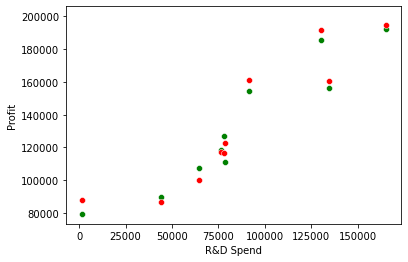

In [36]:
#Compare the points using a plot

sns.scatterplot(x=X_Test["R&D Spend"], y=Y_Test, color='g')   #Actual
Predicated sns.scatterplot(x=X_Test["R&D Spend"], y=Y_Pred, color='r')   #Predicted
plt.plot([100000, 100000], [200000, 200000], linewidth=2)
plt.show()

In [40]:
# Compare with Statsmodel
import statsmodels.api as sm

X, Y = X_Train, Y_Train
X = sm.add_constant(X)

sm_model = sm.OLS(Y,X).fit()
sm_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.952     
Dependent Variable:   Profit             AIC:                  855.9601  
Date:                 2022-09-04 16:04   BIC:                  866.0934  
No. Observations:     40                 Log-Likelihood:       -421.98   
Df Model:             5                  F-statistic:          155.0     
Df Residuals:         34                 Prob (F-statistic):   2.21e-22  
R-squared:            0.958              Scale:                1.0030e+08
-------------------------------------------------------------------------
                  Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const           42276.2006 9093.5858  4.6490 0.0000 23795.8107 60756.5905
R&D Spend           0.7349    0.0710 10.3558 0.0000     0.5907     0.8791
Administration      0.0173    0.0654  0.2637 0.7936    -0.1157     0.1502
Marketing Spend     0.0561    0.0270  2.0790 0.0452     0.0013     0.1110
0               32851.6968 4110.0996  7.9929 0.0000 24498.9695 41204.4240
1                3559.1278 4085.0292  0.8713 0.3897 -4742.6504 11860.9059
-------------------------------------------------------------------------
Omnibus:                 12.609         Durbin-Watson:            1.775  
Prob(Omnibus):           0.002          Jarque-Bera (JB):         13.973 
Skew:                    -1.039         Prob(JB):                 0.001  
Kurtosis:                5.017          Condition No.:            1545477
=========================================================================
* The condition number is large (2e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

***